<a href="https://colab.research.google.com/github/Alexandre77777/computer_math/blob/main/5.%20%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0%20Pandas.%20%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №5. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
pd.__version__

'2.2.1'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [2]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

age          workclass  fnlwgt   education  education.num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital.status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital.gain  capital.loss  hours.per.week  native.country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

1) Выведите последние 10 элеметнов датасета

In [3]:
df.tail(10)

age      workclass  fnlwgt      education  education.num  \
32551   32        Private   34066           10th              6   
32552   43        Private   84661      Assoc-voc             11   
32553   32        Private  116138        Masters             14   
32554   53        Private  321865        Masters             14   
32555   22        Private  310152   Some-college             10   
32556   27        Private  257302     Assoc-acdm             12   
32557   40        Private  154374        HS-grad              9   
32558   58        Private  151910        HS-grad              9   
32559   22        Private  201490        HS-grad              9   
32560   52   Self-emp-inc  287927        HS-grad              9   

            marital.status          occupation    relationship  \
32551   Married-civ-spouse   Handlers-cleaners         Husband   
32552   Married-civ-spouse               Sales         Husband   
32553        Never-married        Tech-support   Not-in-family   
32554   Married-civ-spouse     Exec-managerial         Husband   
32555        Never-married     Protective-serv   Not-in-family   
32556   Married-civ-spouse        Tech-support            Wife   
32557   Married-civ-spouse   Machine-op-inspct         Husband   
32558              Widowed        Adm-clerical       Unmarried   
32559        Never-married        Adm-clerical       Own-child   
32560   Married-civ-spouse     Exec-managerial            Wife   

                      race      sex  capital.gain  capital.loss  \
32551   Amer-Indian-Eskimo     Male             0             0   
32552                White     Male             0             0   
32553   Asian-Pac-Islander     Male             0             0   
32554                White     Male             0             0   
32555                White     Male             0             0   
32556                White   Female             0             0   
32557                White     Male             0             0   
32558                White   Female             0             0   
32559                White     Male             0             0   
32560                White   Female         15024             0   

       hours.per.week  native.country  income  
32551              40   United-States   <=50K  
32552              45   United-States   <=50K  
32553              11          Taiwan   <=50K  
32554              40   United-States    >50K  
32555              40   United-States   <=50K  
32556              38   United-States   <=50K  
32557              40   United-States    >50K  
32558              40   United-States   <=50K  
32559              20   United-States   <=50K  
32560              40   United-States    >50K

2) Сколько колонок и сколько строк в этом датасете?

In [4]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [10]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: Особенность заключается в типе столбцов: workclass - должность может отсутствовать как и occupation - например бездомный, native.country - родная страна может отсутствовать потому что родились там, где нет названия.

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [4]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

7) Какой средний возраст женщин и мужчин?

In [6]:
df['age'].mean()

38.58164675532078

8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: xlabel='education.num'>

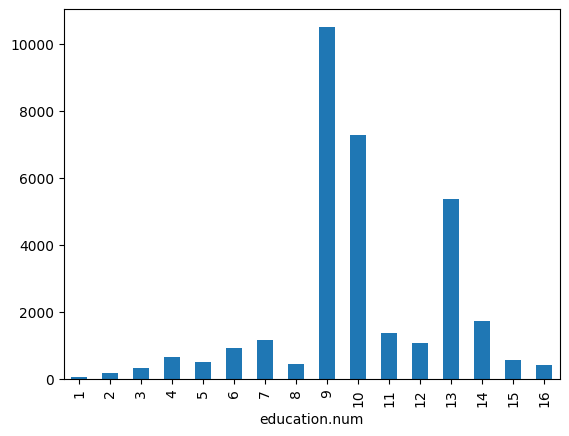

In [11]:
df.groupby('education.num').count()['education'].plot(kind='bar') # типичное нормальное распределение красоты

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [26]:
print(df[df['income'] == ' <=50K']['age'].mean(), df[df['income'] == ' <=50K']['age'].std())

36.78373786407767 14.02008849082488


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [22]:
edu = np.array([' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters', ' Doctorate'])
df_inc = df[df['income'] == ' >50K']
df_edu = df_inc[(df_inc['education'] == edu[0]) | (df_inc['education'] == edu[1]) | (df_inc['education'] == edu[2]) | (df_inc['education'] == edu[3]) | (df_inc['education'] == edu[4]) | (df_inc['education'] == edu[5])]
df_inc.shape == df_edu.shape

False

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [46]:
df_mar = df_inc['marital.status'].str.fullmatch(r' Married[\D]+')
not_mar = df_inc[np.logical_not(df_mar)]
is_mar = df_inc[df_mar]
print(not_mar.shape, is_mar.shape)
if (not_mar.shape[0] > is_mar.shape[0]):
    print("Среди неженатых")
else:
    print("Среди женатых")

(1105, 15) (6736, 15)
Среди женатых


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



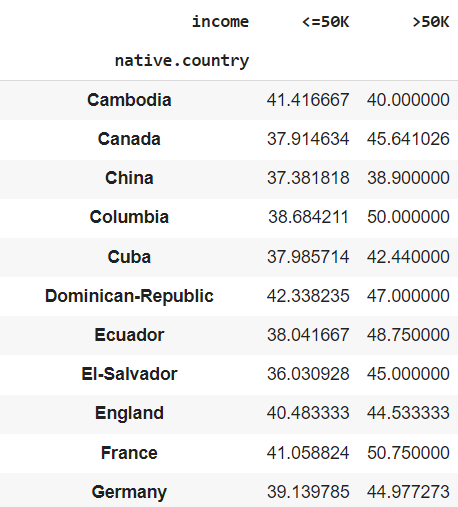

In [13]:
#pd.pivot_table(df, columns = ['native.country','income'], aggfunc='mean')
pd.pivot_table(df, index=['native.country'], values=['hours.per.week'],columns = ['income'], aggfunc=[np.mean])

C:\Users\User\AppData\Local\Temp\ipykernel_13488\1606822701.py:2: FutureWarning: The provided callable <function mean at 0x00000199420131A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df, index=['native.country'], values=['hours.per.week'],columns = ['income'], aggfunc=[np.mean])


mean           
                           hours.per.week           
income                              <=50K       >50K
native.country                                      
Cambodia                        41.416667  40.000000
Canada                          37.914634  45.641026
China                           37.381818  38.900000
Columbia                        38.684211  50.000000
Cuba                            37.985714  42.440000
Dominican-Republic              42.338235  47.000000
Ecuador                         38.041667  48.750000
El-Salvador                     36.030928  45.000000
England                         40.483333  44.533333
France                          41.058824  50.750000
Germany                         39.139785  44.977273
Greece                          41.809524  50.625000
Guatemala                       39.360656  36.666667
Haiti                           36.325000  42.750000
Holand-Netherlands              40.000000        NaN
Honduras                        34.333333  60.000000
Hong                            39.142857  45.000000
Hungary                         31.300000  50.000000
India                           38.233333  46.475000
Iran                            41.440000  47.500000
Ireland                         40.947368  48.000000
Italy                           39.625000  45.400000
Jamaica                         38.239437  41.100000
Japan                           41.000000  47.958333
Laos                            40.375000  40.000000
Mexico                          40.003279  46.575758
Nicaragua                       36.093750  37.500000
Outlying-US(Guam-USVI-etc)      41.857143        NaN
Peru                            35.068966  40.000000
Philippines                     38.065693  43.032787
Poland                          38.166667  39.000000
Portugal                        41.939394  41.500000
Puerto-Rico                     38.470588  39.416667
Scotland                        39.444444  46.666667
South                           40.156250  51.437500
Taiwan                          33.774194  46.800000
Thailand                        42.866667  58.333333
Trinadad&Tobago                 37.058824  40.000000
United-States                   38.799127  45.505369
Vietnam                         37.193548  39.200000
Yugoslavia                      41.600000  49.500000

13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

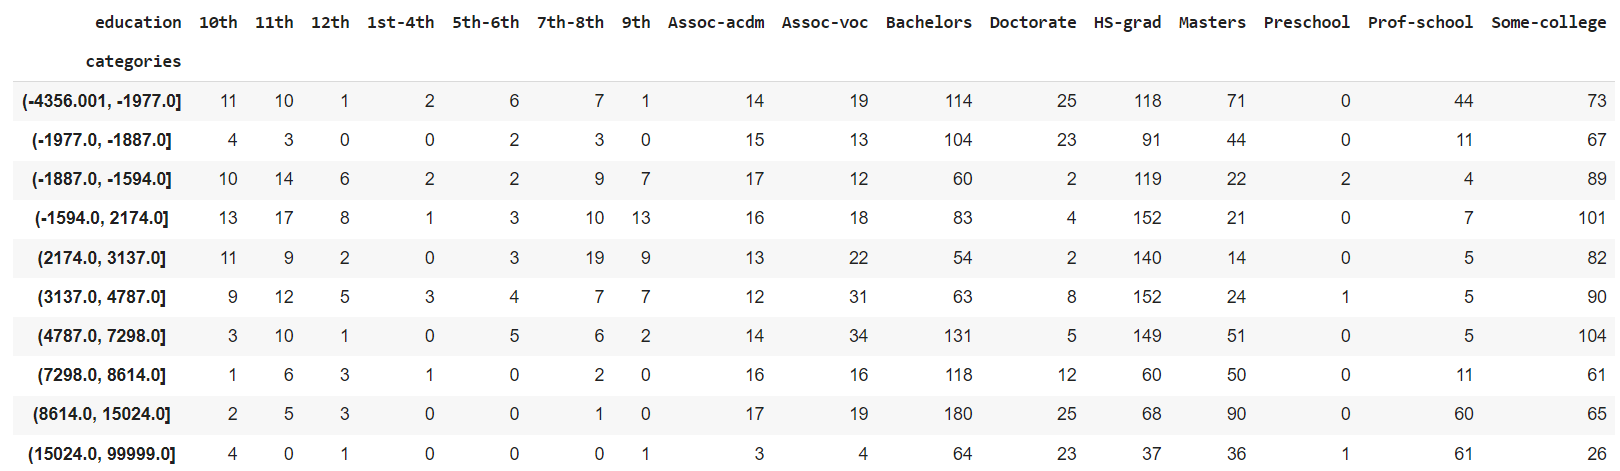

In [25]:
df_new = pd.DataFrame()
df_new['education'] = df['education']
df_new['capital.diff'] = df['capital.gain'] - df['capital.loss']
df_new = df_new[df_new['capital.diff'] != 0]
df_new['categories'] = pd.qcut(df_new['capital.diff'], q = 10)
pd.pivot_table(df_new, index=['categories'], columns = ['education'], fill_value=0,aggfunc=[len])

C:\Users\User\AppData\Local\Temp\ipykernel_15328\2707641971.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df_new, index=['categories'], columns = ['education'], fill_value=0,aggfunc=[len])


len                                           \
                     capital.diff                                            
education                    10th  11th 12th 1st-4th 5th-6th 7th-8th   9th   
categories                                                                   
(-4356.001, -1977.0]         11.0  10.0  1.0     2.0     6.0     7.0   1.0   
(-1977.0, -1887.0]            4.0   3.0  0.0     0.0     2.0     3.0   0.0   
(-1887.0, -1594.0]           10.0  14.0  6.0     2.0     2.0     9.0   7.0   
(-1594.0, 2174.0]            13.0  17.0  8.0     1.0     3.0    10.0  13.0   
(2174.0, 3137.0]             11.0   9.0  2.0     0.0     3.0    19.0   9.0   
(3137.0, 4787.0]              9.0  12.0  5.0     3.0     4.0     7.0   7.0   
(4787.0, 7298.0]              3.0  10.0  1.0     0.0     5.0     6.0   2.0   
(7298.0, 8614.0]              1.0   6.0  3.0     1.0     0.0     2.0   0.0   
(8614.0, 15024.0]             2.0   5.0  3.0     0.0     0.0     1.0   0.0   
(15024.0, 99999.0]            4.0   0.0  1.0     0.0     0.0     0.0   1.0   

                                                                               \
                                                                                
education            Assoc-acdm Assoc-voc Bachelors Doctorate HS-grad Masters   
categories                                                                      
(-4356.001, -1977.0]       14.0      19.0     114.0      25.0   118.0    71.0   
(-1977.0, -1887.0]         15.0      13.0     104.0      23.0    91.0    44.0   
(-1887.0, -1594.0]         17.0      12.0      60.0       2.0   119.0    22.0   
(-1594.0, 2174.0]          16.0      18.0      83.0       4.0   152.0    21.0   
(2174.0, 3137.0]           13.0      22.0      54.0       2.0   140.0    14.0   
(3137.0, 4787.0]           12.0      31.0      63.0       8.0   152.0    24.0   
(4787.0, 7298.0]           14.0      34.0     131.0       5.0   149.0    51.0   
(7298.0, 8614.0]           16.0      16.0     118.0      12.0    60.0    50.0   
(8614.0, 15024.0]          17.0      19.0     180.0      25.0    68.0    90.0   
(15024.0, 99999.0]          3.0       4.0      64.0      23.0    37.0    36.0   

                                                         
                                                         
education            Preschool Prof-school Some-college  
categories                                               
(-4356.001, -1977.0]       0.0        44.0         73.0  
(-1977.0, -1887.0]         0.0        11.0         67.0  
(-1887.0, -1594.0]         2.0         4.0         89.0  
(-1594.0, 2174.0]          0.0         7.0        101.0  
(2174.0, 3137.0]           0.0         5.0         82.0  
(3137.0, 4787.0]           1.0         5.0         90.0  
(4787.0, 7298.0]           0.0         5.0        104.0  
(7298.0, 8614.0]           0.0        11.0         61.0  
(8614.0, 15024.0]          0.0        60.0         65.0  
(15024.0, 99999.0]         1.0        61.0         26.0

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [77]:
df_nfem = pd.DataFrame()
df_nfem['sex'] = df['sex']
df_nfem['native.country'] = df['native.country']
df_nfem['income'] = df['income']
df_nfem = df_nfem[df_nfem['sex'] == ' Female']
del df_nfem['sex']
df_nfem[' <=50K'] = df_nfem[df_nfem['income'] == ' <=50K']['income']
df_nfem[' >50K'] = df_nfem[df_nfem['income'] == ' >50K']['income']

countries = [' United-States', ' Cambodia', ' England', ' Puerto-Rico', ' Canada', ' Germany', ' Outlying-US(Guam-USVI-etc)', ' India', ' Japan', ' Greece', ' South', ' China', ' Cuba', ' Iran', ' Honduras', ' Philippines', ' Italy', ' Poland', ' Jamaica', ' Vietnam', ' Mexico', ' Portugal', ' Ireland', ' France', ' Dominican-Republic', ' Laos', ' Ecuador', ' Taiwan', ' Haiti', ' Columbia', ' Hungary', ' Guatemala', ' Nicaragua', ' Scotland', ' Thailand', ' Yugoslavia', ' El-Salvador', ' Trinadad&Tobago', ' Peru', ' Hong', ' Holand-Netherlands']
stats = pd.DataFrame({
    'native.country': [i for i in countries],
    '%':[df_nfem[df_nfem['native.country'] == i][' >50K'].count() / df_nfem[df_nfem['native.country'] == i][' <=50K'].count() for i in countries]
})
stats.sort_values(by='%', ascending=False)
#United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

native.country         %
35                   Yugoslavia  0.500000
27                       Taiwan  0.363636
23                       France  0.333333
13                         Iran  0.333333
8                         Japan  0.333333
16                        Italy  0.312500
11                        China  0.312500
4                        Canada  0.300000
9                        Greece  0.250000
33                     Scotland  0.250000
2                       England  0.230769
7                         India  0.222222
21                     Portugal  0.200000
30                      Hungary  0.200000
39                         Hong  0.200000
15                  Philippines  0.196721
14                     Honduras  0.166667
22                      Ireland  0.166667
25                         Laos  0.142857
5                       Germany  0.132075
0                 United-States  0.124506
17                       Poland  0.117647
10                        South  0.111111
34                     Thailand  0.100000
32                    Nicaragua  0.090909
12                         Cuba  0.081081
24           Dominican-Republic  0.060606
28                        Haiti  0.052632
19                      Vietnam  0.045455
3                   Puerto-Rico  0.040000
36                  El-Salvador  0.029412
18                      Jamaica  0.023810
20                       Mexico  0.013889
31                    Guatemala  0.000000
29                     Columbia  0.000000
26                      Ecuador  0.000000
1                      Cambodia  0.000000
37              Trinadad&Tobago  0.000000
38                         Peru  0.000000
6    Outlying-US(Guam-USVI-etc)  0.000000
40           Holand-Netherlands  0.000000

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [17]:
dfm = df
r = np.random.randint(low = 0, high = 51, size = df.shape[0])
dfm['magic_salary'] = r
dr = dfm.loc[dfm['income'] == ' >50K', 'magic_salary'].index
for indx in dr:
    dfm.at[indx, 'magic_salary'] = np.random.randint(51, 201)

df_ms = pd.DataFrame({
    "education": dfm['education'],
    "magic_salary": dfm['magic_salary']
})
(df_ms.groupby(by="education").mean()).sort_values(by='magic_salary', ascending=False)

magic_salary
education                 
Doctorate       101.663438
Prof-school      99.491319
Masters          79.455601
Bachelors        66.964519
Assoc-voc        51.091896
Assoc-acdm       50.063730
Some-college     44.642985
HS-grad          40.813065
12th             32.078522
10th             31.297964
7th-8th          30.942724
11th             30.212766
9th              29.394942
5th-6th          28.984985
1st-4th          28.357143
Preschool        25.313725

## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [24]:
#df = pd.read_csv('../../data/bikes_rent.csv.gz', compression='gzip')
df = pd.read_csv("https://raw.githubusercontent.com/siyuanligit/Bike-Sharing-Demand-Kaggle/master/data/train.csv")
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

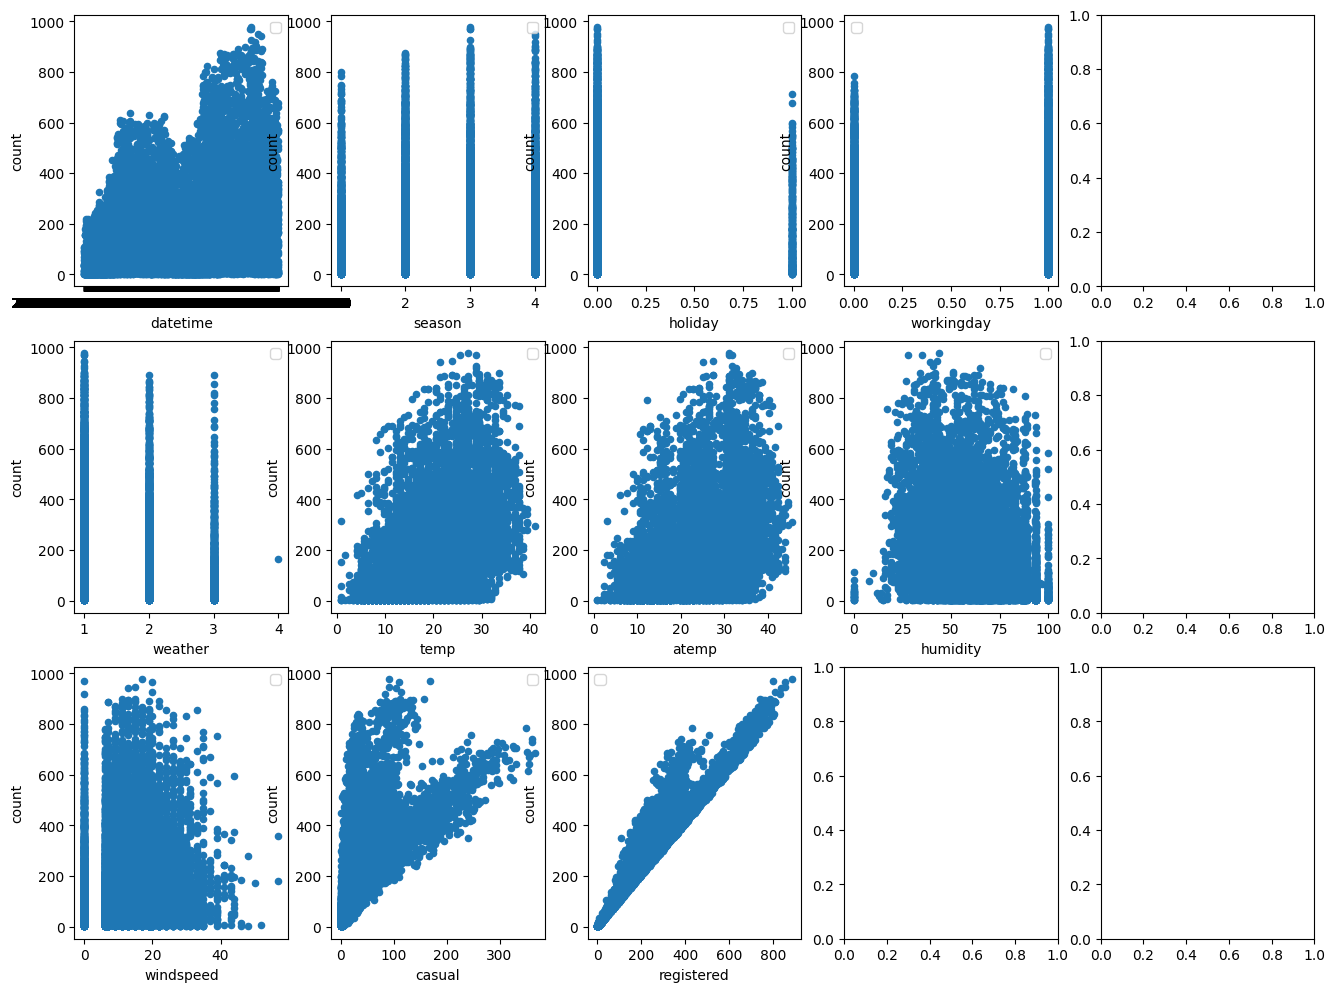

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "count", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





ответ: Прокат существует во все месяцы. Но чаще всего осенью и зимой.

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.



Ответ: Не по празникам чаще берут на прокат. Чаще берут в солнечные дни. В рабочии дни чаще берут велосипед, предполагаю из за более дешевой стоимости проезда и возможности проведения озздоровительной кардионагрузки.

### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



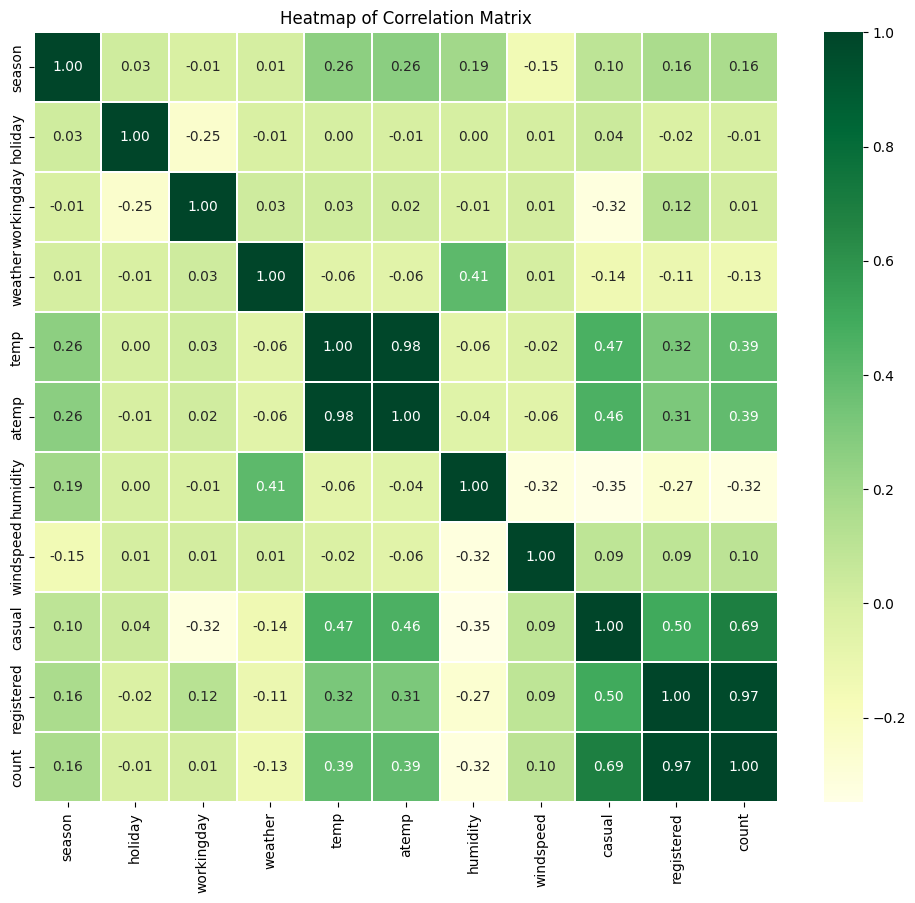

In [7]:
df_cor = df.copy()
del df_cor['datetime']
corr_matrix = df_cor.corr()

# Отображение heatmap корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGn", fmt=".2f", linewidths=0.05)
plt.title("Heatmap of Correlation Matrix")
plt.show()

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Больше всего:
 1. temp и atemp //в целом ожидаемо Ощущения не далеки от реальности.
 2. casual и registered
 3. casual и temp
 4. humidity и weather
Меньше всего:
 1. humidity и casual
 2. casual и workingday
 3. humidity и windspeed
 4. workingday и holiday

### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



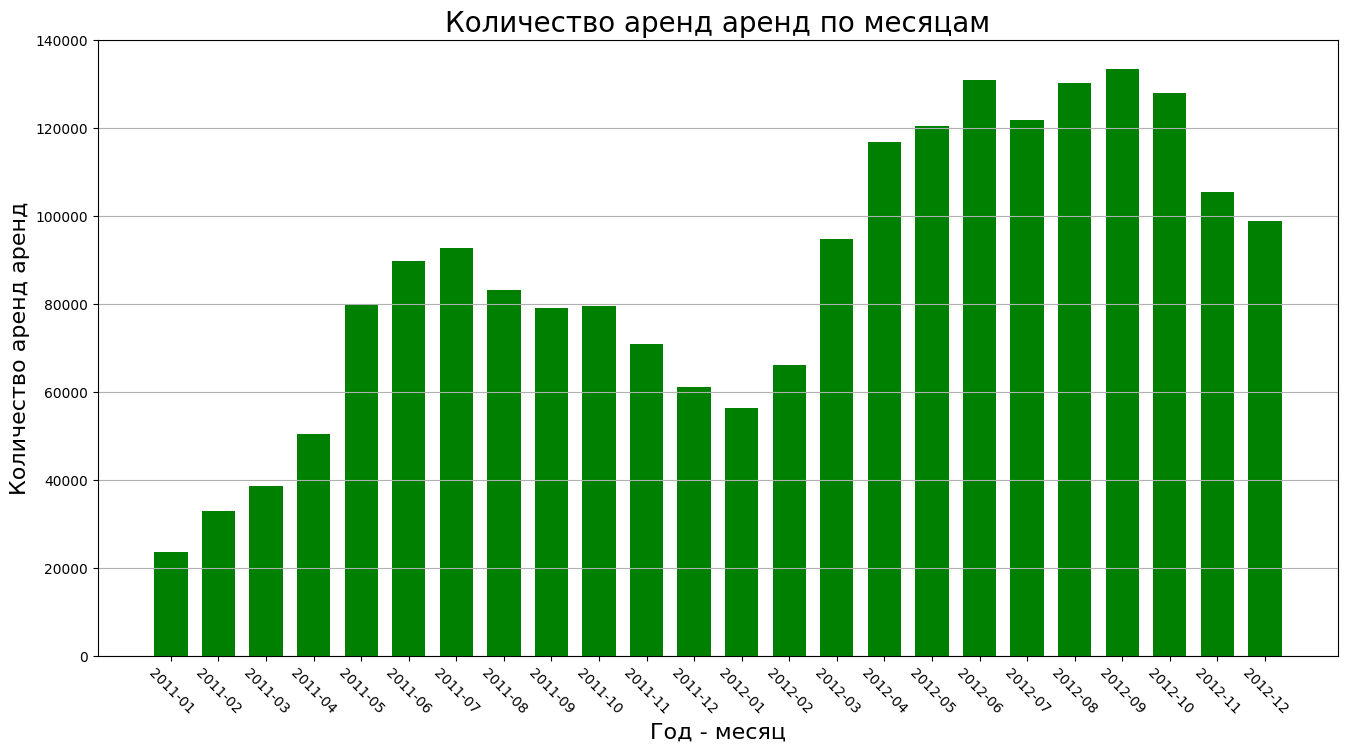

In [26]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
data = df.groupby(['year', 'month'])['count'].sum().reset_index()

x_pos = data['month'] - 1 + (data['year'] - 2011) * 12
plt.figure(figsize=(16, 8))
plt.bar(x_pos, data['count'], width=0.7, color = 'green')
plt.xlabel('Год - месяц', fontsize=16)
plt.ylabel('Количество аренд аренд', fontsize=16)
plt.title('Количество аренд аренд по месяцам', fontsize=20)
plt.xticks(range(0, len(data)), [f"{y}-{m:02d}" for y, m in zip(data['year'], data['month'])], rotation=315)
plt.grid(axis='y')
plt.show()

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: Прокат становится популярнее с определенными месяцами (летними). А погода на летние месяцы не всегда выпадает одинковая.

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



C:\Users\User\AppData\Local\Temp\ipykernel_11004\3736227950.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weekday', data=df, palette="Set1")
C:\Users\User\AppData\Local\Temp\ipykernel_11004\3736227950.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=df, palette="Set2")


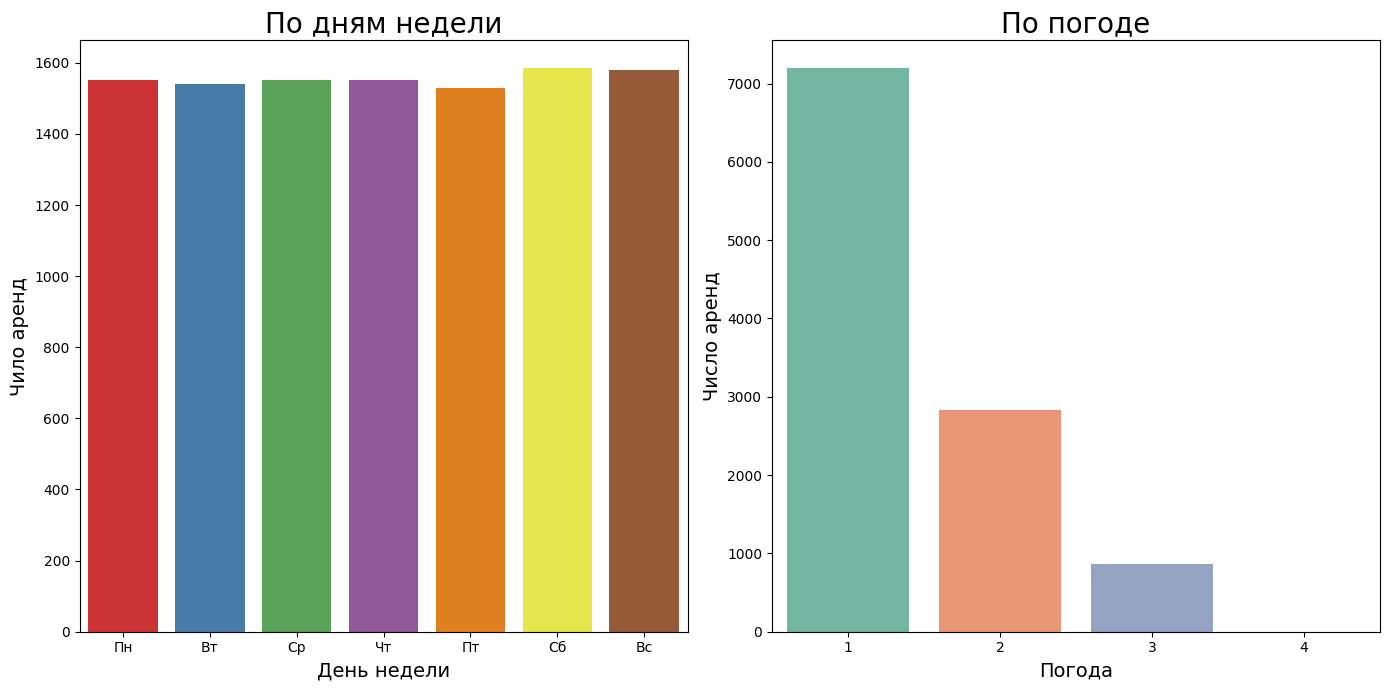

In [27]:
df['weekday'] = df['datetime'].dt.dayofweek
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x='weekday', data=df, palette="Set1")
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Чило аренд', fontsize=14)
plt.title('По дням недели', fontsize=20)

plt.subplot(1, 2, 2)
sns.countplot(x='weather', data=df, palette="Set2")
plt.xlabel('Погода', fontsize=14)
plt.ylabel('Число аренд', fontsize=14)
plt.title('По погоде', fontsize=20)

plt.tight_layout()
plt.show()

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



Ответ: Легко и не принужденно, по воле магии и того кто написал код для сбора данных.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: Равномерно

### 5. Распределение

Постройте распределение целевого признака.


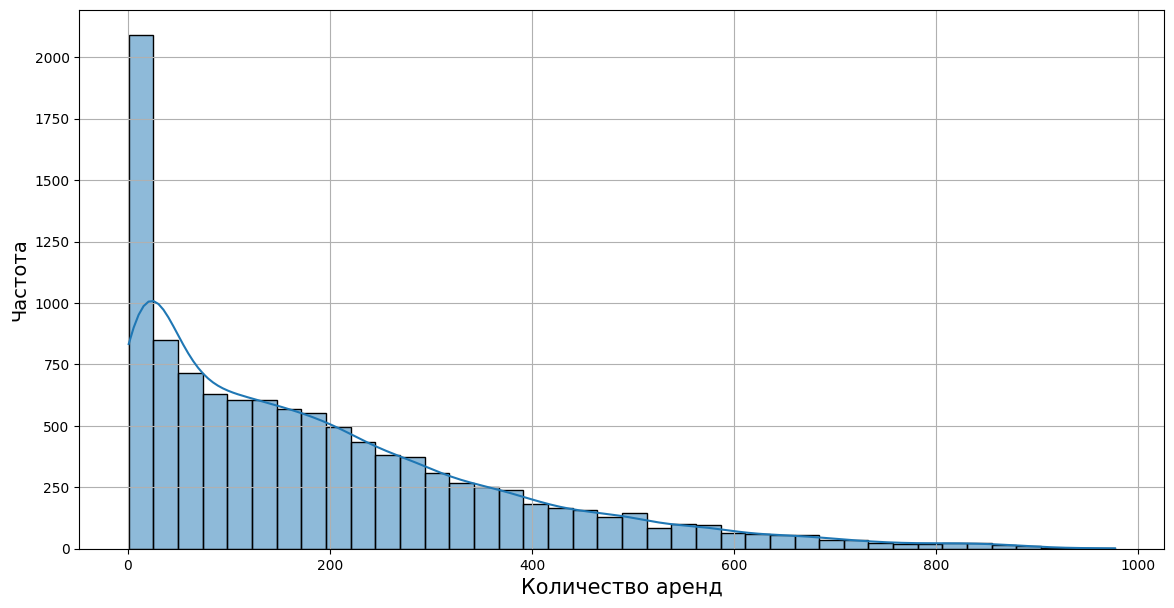

In [52]:
plt.figure(figsize=(14,7))
sns.histplot(df['count'], bins=40, kde=True)
plt.xlabel('Количество аренд', fontsize=15)
plt.ylabel('Частота', fontsize=14)
plt.grid(True)
plt.show()


**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

Ответ: 100

### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



<Figure size 1400x700 with 0 Axes>

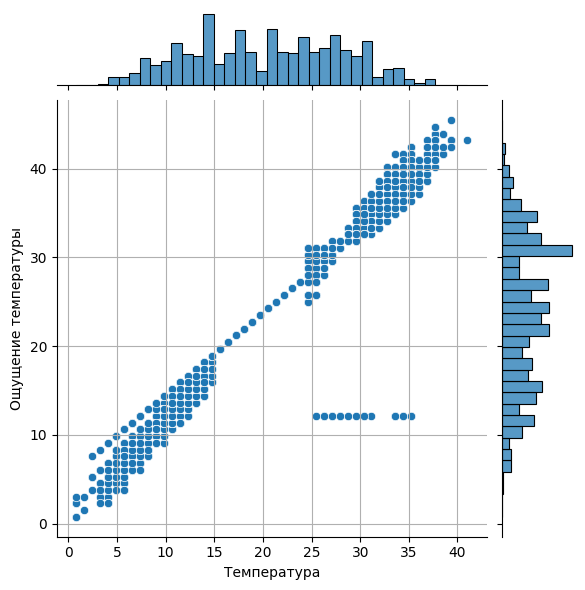

In [58]:
plt.figure(figsize=(14, 7))
sns.jointplot(x='temp', y='atemp', data=df)
plt.ylabel("Ощущение температуры")
plt.xlabel("Температура")
plt.grid()
plt.show()

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: Да, настораживает. Есть некоторое отклонение реальной температуры от ощутимой.

### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




C:\Users\User\AppData\Local\Temp\ipykernel_11004\4293247511.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='count', data=workingday, width = 0.7, palette="hls")
C:\Users\User\AppData\Local\Temp\ipykernel_11004\4293247511.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='count', data=holidays, width=0.7, palette="hls")


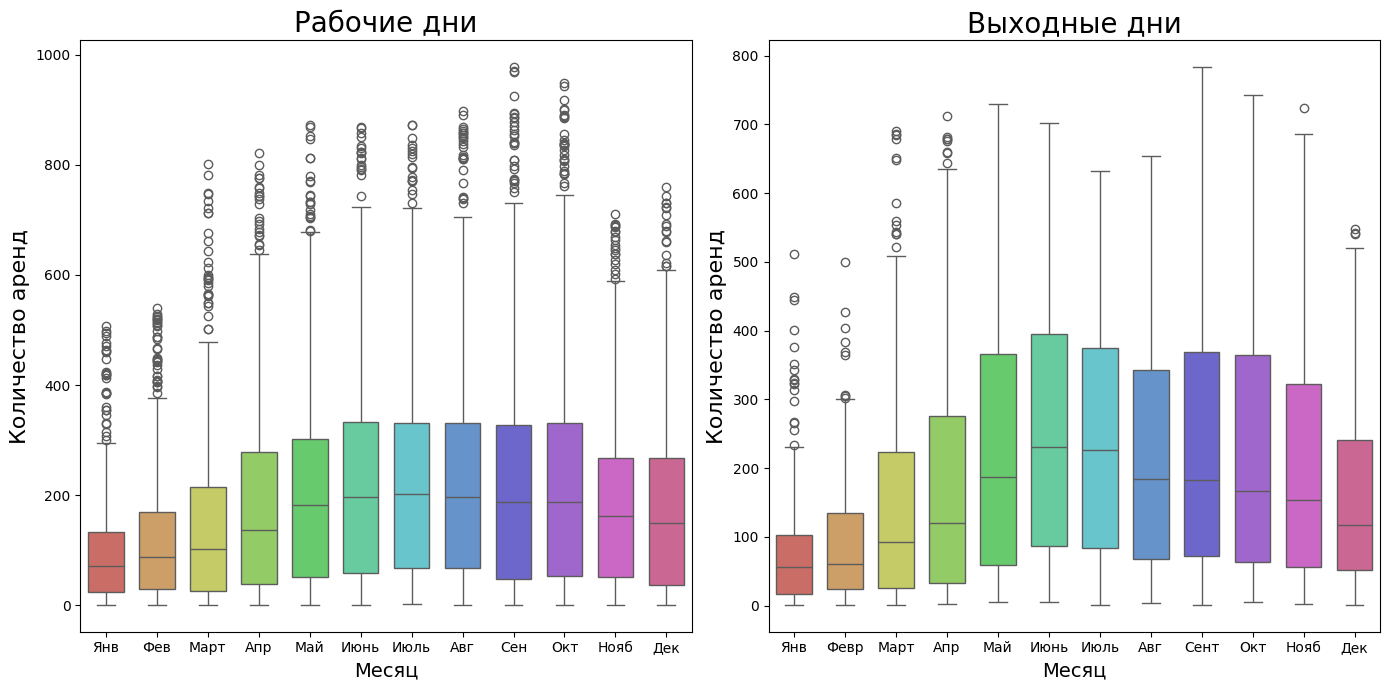

In [28]:
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
workingday = df[df['workingday'] == 1]
sns.boxplot(x='month', y='count', data=workingday, width = 0.7, palette="hls")
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество аренд', fontsize=16)
plt.title('Рабочие дни', fontsize=20)
plt.xticks(range(0, 12), ['Янв', 'Фев', 'Март', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сен', 'Окт', 'Нояб', 'Дек'])

plt.subplot(1, 2, 2)
holidays = df[df['workingday'] == 0]
sns.boxplot(x='month', y='count', data=holidays, width=0.7, palette="hls")
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество аренд', fontsize=16)
plt.title('Выходные дни', fontsize=20)
plt.xticks(range(0, 12), ['Янв', 'Февр', 'Март', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сент', 'Окт', 'Нояб', 'Дек'])

plt.tight_layout()
plt.show()

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Ответ: В нерабочие дни, в теплое время года, люди, скорее всего, чаще арендуют велосипеды для развлечения.

## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Не, ну это бред какой то. Я прошелся по файлам и нашел distutils, да даже простой импорт distutils прошел успешно. 

In [2]:
colab = False # если работаете на своём компьютере, в локальной среде, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [10]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("dataset/StudentsPerformance.csv")

df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


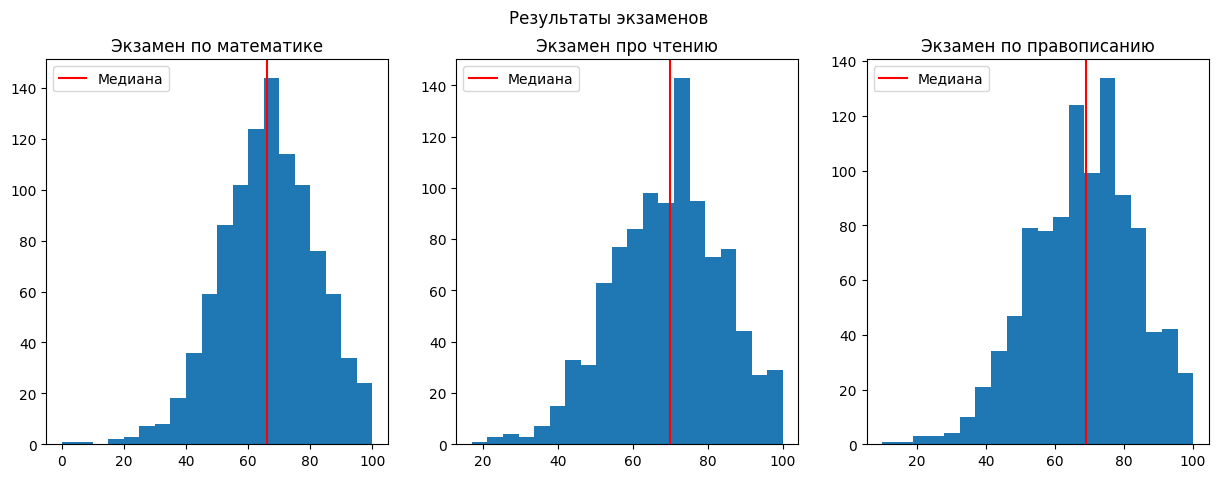

In [44]:
names = {'math score':'Экзамен по математике',
         'reading score':'Экзамен про чтению',
         'writing score':'Экзамен по правописанию'}
median_scores = df[names.keys()].median()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Результаты экзаменов')

for i, subject in enumerate(names.keys()):
    axs[i].hist(df[subject], bins=20)
    axs[i].axvline(median_scores[subject], color='red', label='Медиана')
    axs[i].set_title(names[subject])
    axs[i].legend()

plt.show()

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64


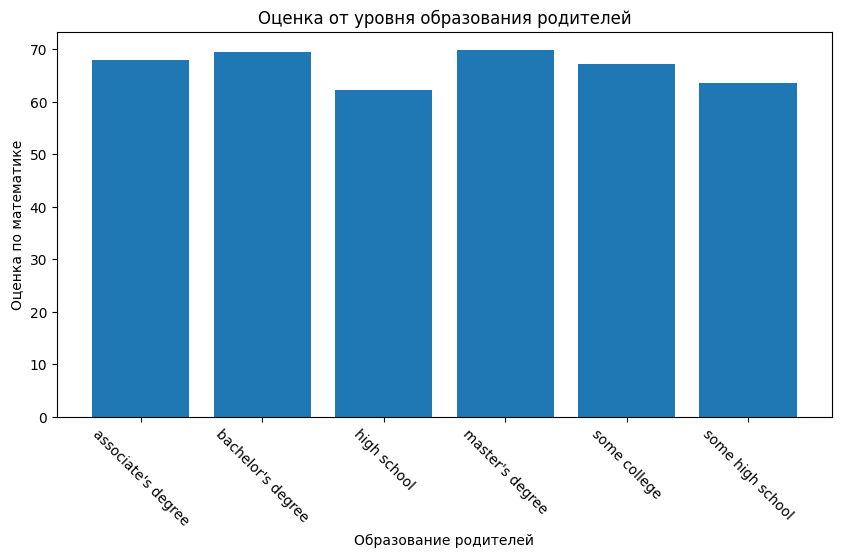

Да, различается. В целом видно, чем выше образование, тем выше баллы по математике. Единственное что смущает associate's degree, это какой уровень?


In [62]:
print(df.value_counts(subset='parental level of education'))
math_level = df.groupby('parental level of education')['math score'].mean()
print(math_level)
plt.figure(figsize=(10, 5))
plt.bar(math_level.index, math_level.values)
plt.xlabel('Образование родителей')
plt.ylabel('Оценка по математике')
plt.title('Оценка от уровня образования родителей')
plt.xticks(rotation=315)
plt.show()
print("Да, различается. В целом видно, чем выше образование, тем выше баллы по математике. Единственное что смущает associate's degree, это какой уровень?")

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [71]:
female_mrw = df[(df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90) & (df['gender'] == 'female')]
print("Число студенток, набравших больше 90 баллов по всем предметам:", len(female_mrw))

Число студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [76]:
group = df.groupby('gender')[['math score', 'reading score', 'writing score']].agg(['min', 'max', 'median'])
group

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

In [81]:
df.groupby(['gender', 'lunch', 'test preparation course'])[['math score', 'reading score', 'writing score']].agg('mean')

math score  reading score  \
gender lunch        test preparation course                              
female free/reduced completed                 60.785714      73.428571   
                    none                      52.890756      63.831933   
       standard     completed                 71.131579      79.798246   
                    none                      66.530233      73.386047   
male   free/reduced completed                 65.639344      65.786885   
                    none                      60.609524      59.076190   
       standard     completed                 75.955752      72.601770   
                    none                      69.832512      64.719212   

                                             writing score  
gender lunch        test preparation course                 
female free/reduced completed                    74.371429  
                    none                         61.781513  
       standard     completed                    81.508772  
                    none                         72.967442  
male   free/reduced completed                    65.737705  
                    none                         55.285714  
       standard     completed                    71.982301  
                    none                         61.906404

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

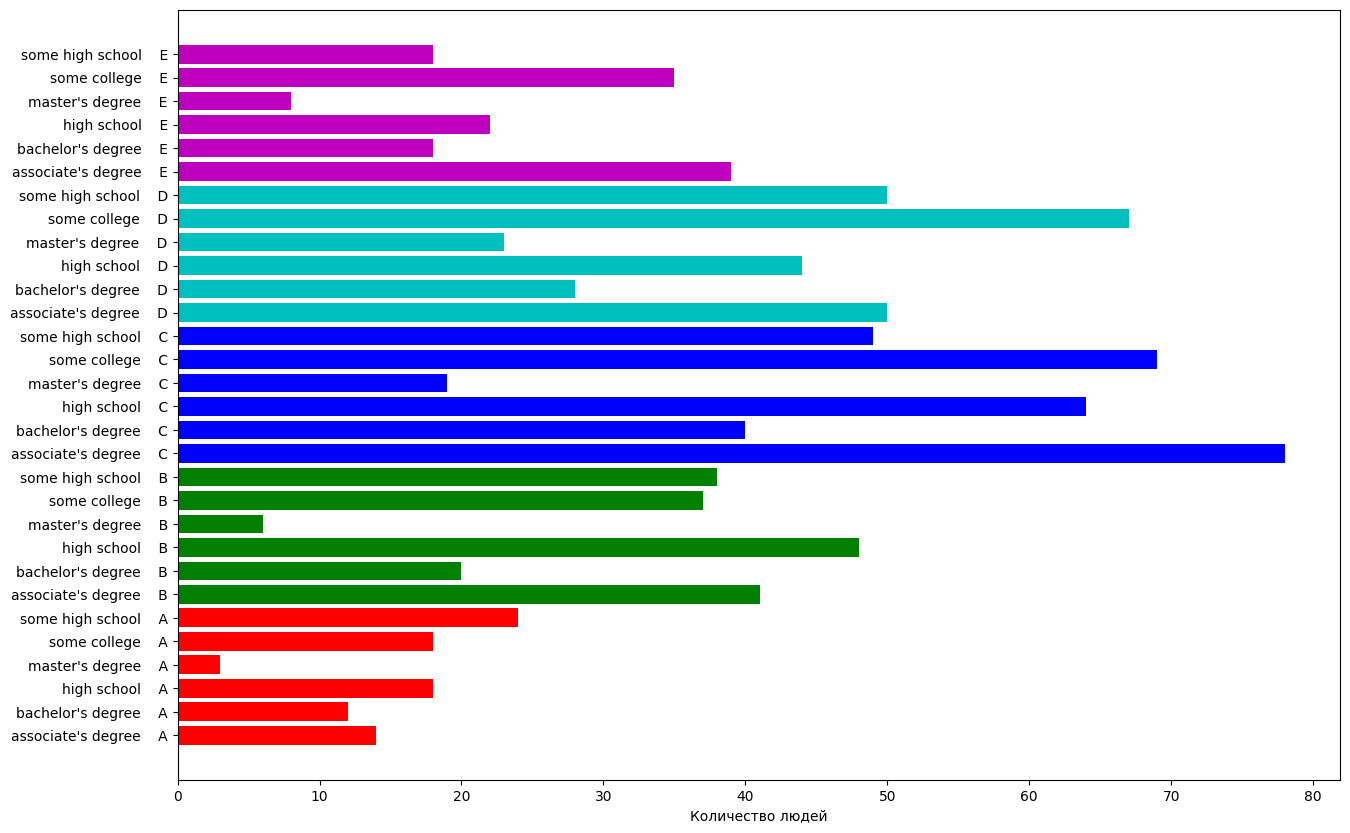

In [41]:
grouped = df.groupby(['race/ethnicity','parental level of education'])['race/ethnicity'].count()
x_labels = [np.array(["%s %4s" % (grouped.index[i][1],grouped.index[i][0][-1]) for i in range(grouped.shape[0])]), np.array([grouped.index[i][0] for i in range(grouped.shape[0])])]
color_map = ['r','g','b', 'c', 'm','k']
plt.figure(figsize = (15, 10))
plt.barh(x_labels[0], grouped.values, height=0.8, color=[color_map[i // 6] for i in range(30)], align='center')
plt.xlabel("Количество людей")
plt.show()

# grouped = df.groupby(['race/ethnicity','parental level of education'])['race/ethnicity'].count().unstack(fill_value=0)
# grouped.plot(kind='barh',figsize=(15,10))

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

<Figure size 640x480 with 0 Axes>

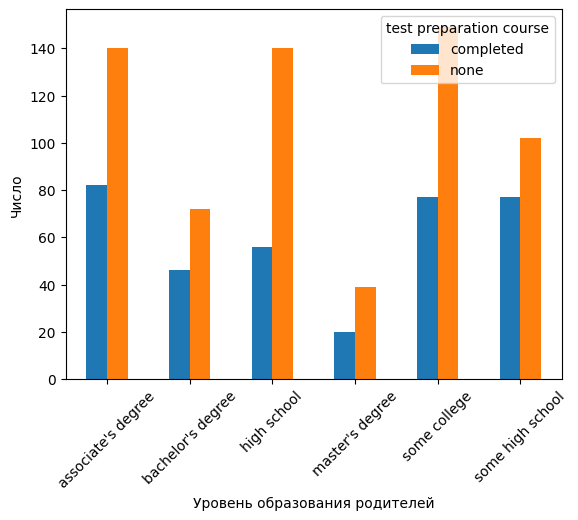

In [42]:
test_prep_by_education = df.groupby('parental level of education')['test preparation course'].value_counts().unstack(fill_value=0)
plt.figure()
test_prep_by_education.plot(kind='bar')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Число')
plt.xticks(rotation=45)
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

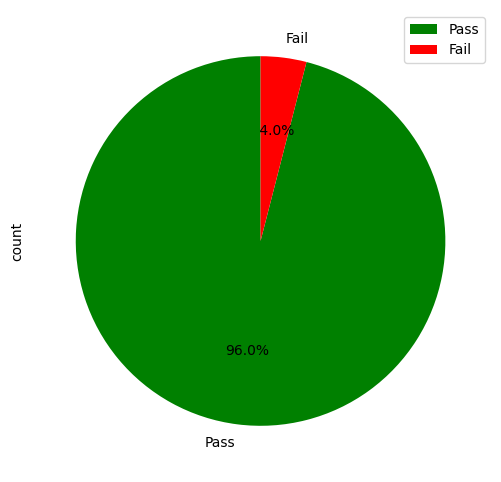

In [46]:
df['math pass'] = df['math score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')

math_pass_counts = df['math pass'].value_counts()

plt.figure(figsize=(6, 6))
math_pass_counts.plot.pie(autopct='%4.1f%%', startangle=90, colors=['g', 'r'])
plt.legend()
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

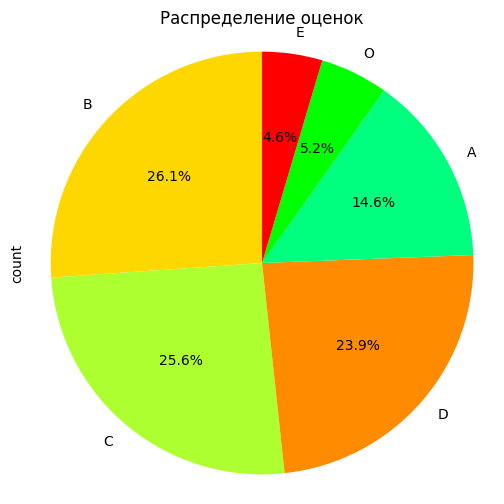

In [28]:
def loc_grade(min, max, label):
    df.loc[(df['average score'] >= min) & (df['average score'] <= max), 'grade'] = label
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

bins = [0, 40, 60, 70, 80, 90, 100]
labels = ['E', 'D', 'C', 'B', 'A', 'O']

for i in range(len(bins) - 1):
    loc_grade(bins[i], bins[i + 1], labels[i])
df.loc[df['math score'] < 40, 'grade'] = 'E'

grade_stud = df['grade'].value_counts()
colors_pie = ['#FFD700', '#ADFF2F', '#FF8C00',  '#00FF7F',  '#00FF00', '#FF0000']

plt.figure(figsize=(6, 6))
grade_stud.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors_pie)

plt.axis('equal')
plt.title('Распределение оценок')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

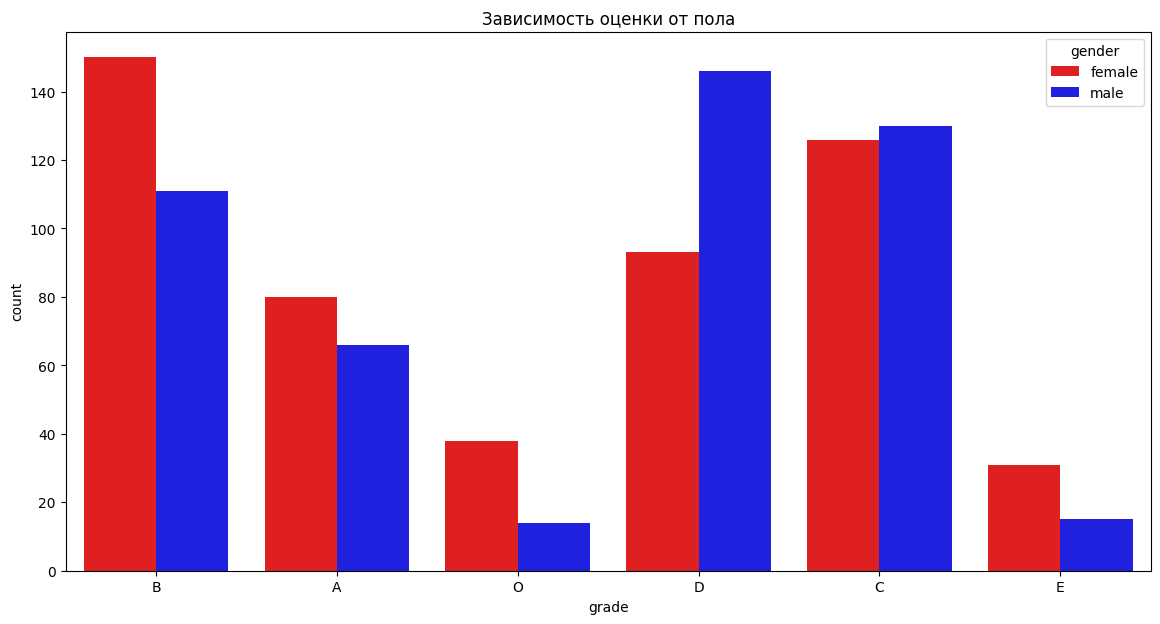

In [30]:
plt.figure(figsize=(14, 7))
sns.countplot(x='grade', hue='gender', data=df, palette=['red', 'blue'])
plt.title('Зависимость оценки от пола')
plt.show()